In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_summary import DataFrameSummary
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.preprocessing import normalize
import time
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [120]:
path = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/train.csv'
path2 = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/test.csv'
path3 = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/gender_submission.csv'
data = pd.read_csv(path)
test = pd.read_csv(path2)
submission = pd.read_csv(path3)

In [121]:
data[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- 1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.
- 2. 탐색적 데이터 분석(exploratory data analysis) - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.
- 3. feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
- 4. model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.
- 5. 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.
- 6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

___
### 1. 전처리
#### 1) 범주형 데이터의 전처리

In [122]:
# Importing dataset
data = data

# Convert categorical variable to numeric
data["Sex_cleaned"]=np.where(data["Sex"]=="male",0,1)
data["Embarked_cleaned"]=np.where(data["Embarked"]=="S",0,
                                  np.where(data["Embarked"]=="C",1,
                                           np.where(data["Embarked"]=="Q",2,3)
                                          )
                                 )
test["Sex_cleaned"]=np.where(test["Sex"]=="male",0,1)
test["Embarked_cleaned"]=np.where(test["Embarked"]=="S",0,
                                  np.where(test["Embarked"]=="C",1,
                                           np.where(test["Embarked"]=="Q",2,3)
                                          )
                                 )
# Cleaning dataset of NaN

# data=data[[
#     "Survived",
#     "Pclass",
#     "Sex_cleaned",
#     "Age",
#     "SibSp",
#     "Parch",
#     "Fare",
#     "Embarked_cleaned"
# ]].dropna(axis=0, how='any')

___
#### 2) feature 추출 및 결측치 대체
- Feature engineering

In [123]:
used_features =[
    "Pclass",
    "Sex_cleaned",
    "Age",
    "Family",
    "Fare",
    "Embarked_cleaned"
]

#### Age의 NaN값 대체
- 정규 표현식
- lambda
- groupby

In [124]:
# Name's title
# Age와 Name을 이용해서 Age의 NaN값을 대체하기 위한 정규표현식 이용하기.
data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
test['Initial'] = test.Name.str.extract('([A-Za-z]+)\.')

In [125]:
# Initial에 따른 Age의 평균값으로 NaN값 대체
data['Age'] = data.groupby('Initial')['Age'].apply(lambda x: x.fillna(x.mean()))
test['Age'] = test.groupby('Initial')['Age'].apply(lambda x: x.fillna(x.mean()))

#### Family col 생성
data['New_col'] = data + data

In [126]:
# SibSp + Parch + 1 = Family
data['Family'] = data['SibSp'] + data['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

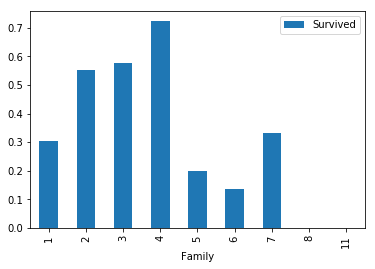

In [127]:
# 2~4 이상의 가족 구성원의 생존률이 50%가 넘음
data[['Family', 'Survived']].groupby(by='Family').agg('mean').plot.bar()

#### 연속형 변수 범주화
- pd.cut(), pd.qcut()
- data binning

In [128]:
data['Age'] = pd.cut(data['Age'], 7, labels=range(7))
data['Fare'] = pd.cut(data['Fare'], 4, labels=range(4))

test['Age'] = pd.cut(test['Age'], 7, labels=range(7))
test['Fare'] = pd.cut(test['Fare'], 4, labels=range(4))

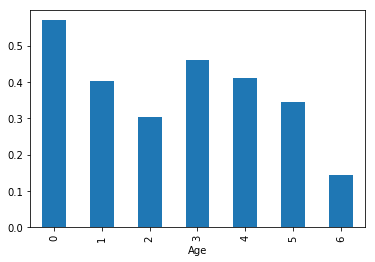

In [129]:
data.groupby('Age')['Survived'].mean().plot.bar()

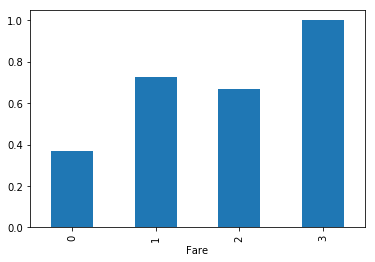

In [130]:
data.groupby('Fare')['Survived'].mean().plot.bar()

#### Feature Scaling
- minmax_normalize
- scale

In [131]:
# data[['Age', 'Fare']] = minmax_scale(data[['Age', 'Fare']])

#### 결측치 제거
- dropna()

In [132]:
DataFrameSummary(test).columns_stats

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_cleaned,Embarked_cleaned,Initial,Family
counts,418,418,418,418,417,418,418,418,417,91,418,418,418,418,418
uniques,418,3,418,2,7,7,8,363,4,76,3,2,3,9,9
missing,0,0,0,0,1,0,0,0,1,327,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0.24%,0%,0%,0%,0.24%,78.23%,0%,0%,0%,0%,0%
types,numeric,numeric,unique,bool,categorical,numeric,numeric,categorical,categorical,categorical,categorical,bool,numeric,categorical,numeric


In [133]:
test.fillna(method='ffill', inplace=True)

- 그냥 지우자...

___
#### 3) 데이터 나누기

In [134]:
# Split dataset in training and test datasets
X_train, X_test = train_test_split(data, test_size=0.25, random_state=int(time.time()))

___
### 2. Base 모델 생성

In [135]:
# Naive Bayes
# Instantiate the classifier
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
models = [gnb, mnb, bnb]

used_features =[
    "Pclass",
    "Sex_cleaned",
    "Age",
    "Family",
    "Fare",
    "Embarked_cleaned"
]


# Train classifier
for model in models:
    model.fit(
        X_train[used_features].values,
        X_train["Survived"]
    )
    y_pred = model.predict(X_test[used_features])

    # Print results
    print("{}: Number of mislabeled points out of a total {} points : {}\n performance {:05.2f}%\n"
          .format(model,
              X_test.shape[0],
              (X_test["Survived"] != y_pred).sum(),
              100*(1-(X_test["Survived"] != y_pred).sum()/X_test.shape[0])
    ))

GaussianNB(priors=None, var_smoothing=1e-09): Number of mislabeled points out of a total 223 points : 44
 performance 80.27%

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True): Number of mislabeled points out of a total 223 points : 46
 performance 79.37%

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True): Number of mislabeled points out of a total 223 points : 47
 performance 78.92%



- 모델의 parameter를 하나도 건드리지 않았을 때, gnb의 예측도가 가장 높음.

___
### 3. 성능 개선 (추후 예정)
- Fare 정보만을 사용하여 분류를 제한하자.

In [137]:
mean_survival=np.mean(X_train["Survived"])
mean_not_survival=1-mean_survival
print("Survival prob = {:03.2f}%, Not survival prob = {:03.2f}%"
      .format(100*mean_survival,100*mean_not_survival))

Survival prob = 38.47%, Not survival prob = 61.53%


Compute probability distribution function :
- P(fare| Survival = 0)
- P(fare| Survival = 1)

In [138]:
# mean_fare_survived = np.mean(X_train[X_train["Survived"]==1]["Fare"])
# std_fare_survived = np.std(X_train[X_train["Survived"]==1]["Fare"])
# mean_fare_not_survived = np.mean(X_train[X_train["Survived"]==0]["Fare"])
# std_fare_not_survived = np.std(X_train[X_train["Survived"]==0]["Fare"])

# print("mean_fare_survived = {:03.2f}".format(mean_fare_survived))
# print("std_fare_survived = {:03.2f}".format(std_fare_survived))
# print("mean_fare_not_survived = {:03.2f}".format(mean_fare_not_survived))
# print("std_fare_not_survived = {:03.2f}".format(std_fare_not_survived))

___
### 4. 결론

In [139]:
# 모델의 예측값
y_pred = gnb.predict(test[used_features])

In [112]:
# submission의 Survived column을 예측한 값으로 대체하기
submission.Survived = y_pred

In [118]:
# DataFrame -> csv 파일 저장
submission.to_csv('gender_submission01.csv', index=False)

- 아래 업로드 하는 곳에다가 csv 형식으로 저장한 파일을 제출하면 됩니당.
- [업로드 하는 곳](https://www.kaggle.com/c/titanic/submit)